# TITANIC: SURVIVAL ANALYSIS

O clássico caso do Titanic
Uma das mais famosas competições de Machine Learning é o Naufrágio do Titanic. Trata-se de uma tarefa voltada para iniciantes onde é preciso prever quais passageiros sobreviveriam ao terrível desastre que atingiu o mundo no século passado. E é ela mesmo que iremos fazer.

Antes de mais nada, vamos entender os dados com os quais vamos trabalhar. O dataset da competição contém as seguintes colunas.

<B>PassengerId</b>: Número de identificação do passageiro;

<B>Survived</b>: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

<B>Pclass</b>: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

<B>Name</b>: Nome do passageiro;

<B>Sex</b>: Sexo do passageiro;

<B>Age</b>: Idade do passageiro em anos;

<B>SibSp</b>: Quantidade de irmãos e cônjuges a bordo ;

<B>Parch</b>: Quantidade de pais e filhos a bordo;

<B>Ticket</b>: Número da passagem;

<B>Fare</b>: Preço da passagem;

<B>Cabin</b>: Número da cabine do passageiro;

<B>Embarked</b>: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [2]:
# Data Analysis
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [3]:
#Setting up functions for visualization

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( plt.hist , var , alpha=0.5)
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    
# Function inspired by Helge Bjorland: An Interactive Data Science Tutorial

# Load Data

In [4]:
# Load data
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

df_full = [df_train, df_test]

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Analysis

/Users/robsonfernandes/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


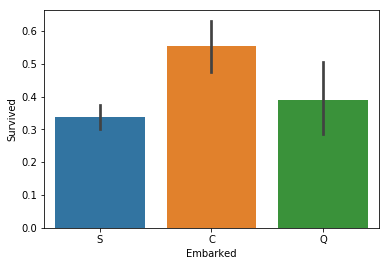

In [7]:
sns.barplot(x=df_train['Embarked'],y=df_train['Survived'] )

Os passageiros que embarcaram em C = Cherbourg tiveram mais chance de sobrevivência, seguidos por Q = Queenstown

### Continuous Variables: Age, Fare vs Survival

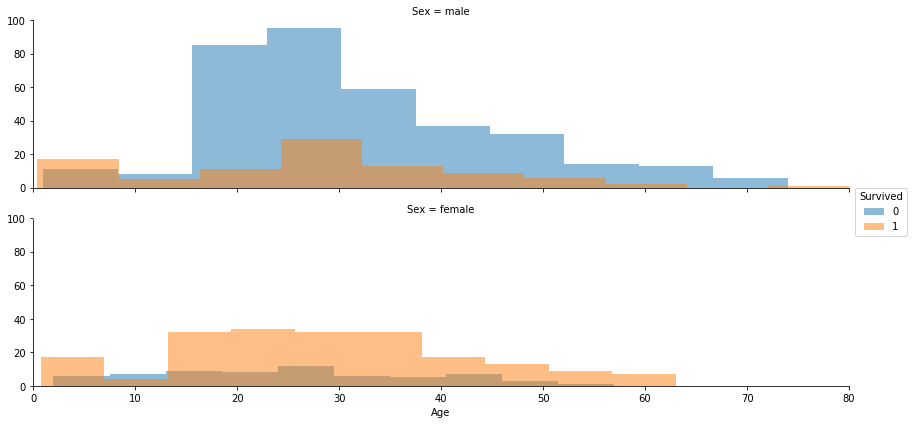

In [8]:
plot_distribution( df_train , var = 'Age' , target = 'Survived', row = 'Sex')

# Data Normalization and Transformation

In [10]:
#missing Embarked
port_mode = df_train.Embarked.mode()[0]

#port_mode
df_train['Embarked'] = df_train['Embarked'].fillna(port_mode)

#missing Fare
fare_median = df_test.Fare.median()
#fare_median
df_test['Fare'] = df_test['Fare'].fillna(fare_median)

In [11]:
#numeric values for Sex
for dataset in df_full:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [12]:
#numeric values to Embarked
for dataset in df_full:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 , 'C':1 , 'Q':2}).astype(int)

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [14]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [15]:
for dataset in df_full:
    dataset.drop(['Name','SibSp','Parch','Ticket','Cabin'], axis= 1, inplace = True)

In [16]:
df_train.head()
df_test.head()

df_test.fillna(0, inplace=True)
df_train.fillna(0, inplace=True)

In [17]:
X_train = df_train.drop(["Survived","PassengerId"], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop(["PassengerId"], axis=1).copy()

# Model

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [19]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.45

# Desafio

1) Aumentar o score do modelo atual selecionando novas variáveis (features) do dataset. 

Para casos de variáveis categórias, propor transformações de dados. 
Dica: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
        
2) Testar novos modelos de machine learning